In [1]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt

%matplotlib inline

In [2]:
df = pd.read_csv("/Users/myazdaniUCSD/Documents/applied-math-for-ML/data/sd-airbnb-listings.csv")
df["price"] = df["price"].replace( '[\$,)]','', regex=True).astype(float)

In [3]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [4]:
df.host_since.head()

0    2016-01-26
1    2015-08-20
2    2015-08-05
3    2016-04-12
4    2013-01-08
Name: host_since, dtype: object

In [5]:
df[['host_since', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'number_of_reviews',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'requires_license', 'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification', 'calculated_host_listings_count',
       'reviews_per_month']].describe()

,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
count,6608.000000,6608.000000,6597.000000,6605.000000,6604.000000,105.000000,6608.000000,6608.000000,6608.000000,6608.000000,4482.000000,4466.000000,4467.000000,4465.000000,4469.000000,4468.000000,4468.000000,6608.000000,4590.000000
mean,14.202785,4.183263,1.473473,1.588796,2.185796,1215.828571,1.711713,2.667827,945.109413,14.052663,94.380411,9.595611,9.498545,9.789250,9.785187,9.648389,9.455685,6.651029,1.733240
std,54.874589,2.849992,0.858805,1.138579,1.709167,3168.834627,1.754400,5.373163,12424.524534,29.048306,7.822489,0.797768,0.895671,0.604768,0.635734,0.681164,0.835499,15.760300,1.757038
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,1.000000,0.020000
25%,1.000000,2.000000,1.000000,1.000000,1.000000,200.000000,1.000000,1.000000,31.000000,0.000000,92.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000,0.470000
50%,2.000000,4.000000,1.000000,1.000000,2.000000,840.000000,1.000000,2.000000,1125.000000,3.000000,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.000000
75%,4.000000,6.000000,2.000000,2.000000,3.000000,1401.000000,2.000000,3.000000,1125.000000,14.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,3.000000,2.450000
max,837.000000,21.000000,10.000000,10.000000,16.000000,32292.000000,18.000000,184.000000,1000000.000000,367.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,90.000000,12.710000


In [6]:
df_rel = df[['host_since', # date
             'host_response_time', # categorical
             'host_response_rate', # categorical
             'host_acceptance_rate', # numeric
             'host_is_superhost', # categorical
             'host_total_listings_count', # numeric
             'host_has_profile_pic', # categorical
             'host_identity_verified', # categorical
             'is_location_exact', # categorical
             'property_type', # categorical
             'room_type', # categorical
             'accommodates',# numeric
             'bathrooms', # numeric
             'bedrooms', # numeric
             'beds', # numeric
             'bed_type', # categorical
             'amenities', # categorical
             'square_feet', # numeric
             'guests_included', # numeric
             'extra_people', # categorical
             'minimum_nights', # numeric
             'maximum_nights', # numeric
             'number_of_reviews', # numeric
             'first_review', # date
             'last_review', # date
             'review_scores_rating', # numeric
             'review_scores_accuracy', # numeric 
             'review_scores_cleanliness', # numeric
             'review_scores_checkin', # numeric
             'review_scores_communication', # numeric
             'review_scores_location', # numeric
             'review_scores_value', # numeric
             'requires_license', # numeric
             'instant_bookable',# categorical
             'cancellation_policy', # categorical
             'require_guest_profile_picture', # categorical
             'require_guest_phone_verification', # categorical
             'calculated_host_listings_count', # numeric
             'reviews_per_month' # numeric
            ]]

In [7]:
df_rel.columns

Index(['host_since', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'is_location_exact', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'amenities', 'square_feet', 'guests_included',
       'extra_people', 'minimum_nights', 'maximum_nights', 'number_of_reviews',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'requires_license',
       'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count', 'reviews_per_month'],
      dtype='object')

In [8]:
import time


pd.to_datetime(time.strftime("%Y-%m-%d"))

Timestamp('2017-11-17 00:00:00')

In [9]:
pd.options.mode.chained_assignment = None # turning off SettingWithCopyWarning

df_rel[['host_since','first_review', 'last_review']] = (df_rel[['host_since', 'first_review', 'last_review']]
                                                        .apply(lambda x: pd.to_datetime(x)))

df_rel["num_days_hosting"] = (pd.to_datetime(time.strftime("%Y-%m-%d")) - df_rel.host_since).dt.days
df_rel["reviews_day_diff"] = (df_rel.last_review - df_rel.first_review).dt.days

In [10]:
df_rel.num_days_hosting.head()

0     661
1     820
2     835
3     584
4    1774
Name: num_days_hosting, dtype: int64

In [11]:
df_rel.drop(['host_since','first_review', 'last_review'], inplace=True, axis = 1)

In [12]:
df_rel.host_acceptance_rate = df_rel.host_acceptance_rate.apply(lambda x: x/100 if type(x) is float else float(x.strip("%"))/100)

In [13]:
df_rel.host_response_rate = df_rel.host_response_rate.apply(lambda x: x/100 if type(x) is float else float(x.strip("%"))/100)

In [14]:
df_rel["square_feet_log"] = np.log10(1+df_rel.square_feet)

In [15]:
df_rel["num_days_hosting_log"] = np.log10(1+df_rel.num_days_hosting)

In [16]:
df_rel["number_of_reviews_log"] = np.log10(1+df_rel.number_of_reviews)

In [17]:
df_rel["minimum_nights_log"] = np.log10(1+df_rel.minimum_nights)

In [18]:
df_rel["maximum_nights_log"] = np.log10(1+df_rel.maximum_nights)

In [19]:
df_rel.head()

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,is_location_exact,property_type,room_type,...,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,num_days_hosting,reviews_day_diff,square_feet_log,num_days_hosting_log,number_of_reviews_log,minimum_nights_log,maximum_nights_log
0,within an hour,0.97,0.85,f,2,t,t,t,House,Private room,...,f,2,4.57,661,34.0,NaN,2.820858,0.90309,0.301030,3.051538
1,within a day,0.80,1.00,f,1,t,t,t,Condominium,Private room,...,f,1,0.76,820,247.0,NaN,2.914343,0.90309,0.477121,1.505150
2,NaN,NaN,NaN,f,1,t,f,t,Condominium,Entire home/apt,...,f,1,0.09,835,0.0,NaN,2.922206,0.30103,0.301030,3.051538
3,within an hour,1.00,1.00,f,1,t,t,t,Townhouse,Entire home/apt,...,f,1,3.00,584,17.0,NaN,2.767156,0.60206,0.477121,1.491362
4,within an hour,1.00,1.00,t,2,t,t,t,House,Private room,...,f,2,NaN,1774,NaN,NaN,3.249198,0.00000,0.301030,3.051538


In [20]:
df_rel.apply(lambda x: type(x[0]))

host_response_time                    <class 'str'>
host_response_rate                  <class 'float'>
host_acceptance_rate                <class 'float'>
host_is_superhost                     <class 'str'>
host_total_listings_count             <class 'int'>
host_has_profile_pic                  <class 'str'>
host_identity_verified                <class 'str'>
is_location_exact                     <class 'str'>
property_type                         <class 'str'>
room_type                             <class 'str'>
accommodates                          <class 'int'>
bathrooms                           <class 'float'>
bedrooms                            <class 'float'>
beds                                <class 'float'>
bed_type                              <class 'str'>
amenities                             <class 'str'>
square_feet                         <class 'float'>
guests_included                       <class 'int'>
extra_people                          <class 'str'>
minimum_nigh

In [21]:
cols = list(df_rel.columns)
df_indicators = df_rel[cols].isnull().astype(int).add_suffix('_missing')

In [22]:
cols = [item for x in list(df_rel.columns) for item in (x, x + '_missing')]

df_rel_ind = pd.concat([df_rel, df_indicators], axis=1).reindex(cols, axis=1)

df_rel_ind.head()

,host_response_time,host_response_time_missing,host_response_rate,host_response_rate_missing,host_acceptance_rate,host_acceptance_rate_missing,host_is_superhost,host_is_superhost_missing,host_total_listings_count,host_total_listings_count_missing,...,square_feet_log,square_feet_log_missing,num_days_hosting_log,num_days_hosting_log_missing,number_of_reviews_log,number_of_reviews_log_missing,minimum_nights_log,minimum_nights_log_missing,maximum_nights_log,maximum_nights_log_missing
0,within an hour,0,0.97,0,0.85,0,f,0,2,0,...,NaN,1,2.820858,0,0.90309,0,0.301030,0,3.051538,0
1,within a day,0,0.80,0,1.00,0,f,0,1,0,...,NaN,1,2.914343,0,0.90309,0,0.477121,0,1.505150,0
2,NaN,1,NaN,1,NaN,1,f,0,1,0,...,NaN,1,2.922206,0,0.30103,0,0.301030,0,3.051538,0
3,within an hour,0,1.00,0,1.00,0,f,0,1,0,...,NaN,1,2.767156,0,0.60206,0,0.477121,0,1.491362,0
4,within an hour,0,1.00,0,1.00,0,t,0,2,0,...,NaN,1,3.249198,0,0.00000,0,0.301030,0,3.051538,0


In [23]:
df_rel_ind.iloc[:,np.where(df_rel_ind.apply(lambda x: len(pd.unique(x))) > 1)[0]].head()

,host_response_time,host_response_time_missing,host_response_rate,host_response_rate_missing,host_acceptance_rate,host_acceptance_rate_missing,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,...,reviews_per_month_missing,num_days_hosting,reviews_day_diff,reviews_day_diff_missing,square_feet_log,square_feet_log_missing,num_days_hosting_log,number_of_reviews_log,minimum_nights_log,maximum_nights_log
0,within an hour,0,0.97,0,0.85,0,f,2,t,t,...,0,661,34.0,0,NaN,1,2.820858,0.90309,0.301030,3.051538
1,within a day,0,0.80,0,1.00,0,f,1,t,t,...,0,820,247.0,0,NaN,1,2.914343,0.90309,0.477121,1.505150
2,NaN,1,NaN,1,NaN,1,f,1,t,f,...,0,835,0.0,0,NaN,1,2.922206,0.30103,0.301030,3.051538
3,within an hour,0,1.00,0,1.00,0,f,1,t,t,...,0,584,17.0,0,NaN,1,2.767156,0.60206,0.477121,1.491362
4,within an hour,0,1.00,0,1.00,0,t,2,t,t,...,1,1774,NaN,1,NaN,1,3.249198,0.00000,0.301030,3.051538


In [24]:
df_rel_ind = df_rel_ind.iloc[:,np.where(df_rel_ind.apply(lambda x: len(pd.unique(x))) > 1)[0]]

In [25]:
from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import Imputer, StandardScaler
from sklearn_pandas import CategoricalImputer


In [26]:
df_rel_ind.apply(lambda x: type(x[0]))

host_response_time                       <class 'str'>
host_response_time_missing               <class 'int'>
host_response_rate                     <class 'float'>
host_response_rate_missing               <class 'int'>
host_acceptance_rate                   <class 'float'>
host_acceptance_rate_missing             <class 'int'>
host_is_superhost                        <class 'str'>
host_total_listings_count                <class 'int'>
host_has_profile_pic                     <class 'str'>
host_identity_verified                   <class 'str'>
is_location_exact                        <class 'str'>
property_type                            <class 'str'>
room_type                                <class 'str'>
accommodates                             <class 'int'>
bathrooms                              <class 'float'>
bathrooms_missing                        <class 'int'>
bedrooms                               <class 'float'>
bedrooms_missing                         <class 'int'>
beds      

In [27]:
cols = list(df_rel_ind.columns)
df_mapper = []
for col in cols:
    if col.split("_")[-1] == "missing":
        df_mapper.append((col, None))
    else:
        if type(df_rel_ind[col][0]) is str:
            df_mapper.append((col, [CategoricalImputer(), LabelBinarizer()]))
        else:
            df_mapper.append(([col], [Imputer(strategy = "most_frequent"), StandardScaler()]))

In [28]:
mapper = DataFrameMapper(df_mapper)

In [29]:
X = mapper.fit_transform(df_rel_ind)
y = np.log10(np.array(df.price))

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [32]:
from sklearn.linear_model import Ridge

rlm = Ridge(alpha = 1e-10)


In [33]:
%%time
rlm.fit(X_train, y_train)

CPU times: user 6.48 s, sys: 425 ms, total: 6.9 s
Wall time: 2.43 s


/Users/myazdaniUCSD/anaconda/envs/py36/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 7.712627261425979e-17 / 1.1102230246251565e-16
  RuntimeWarning)


Ridge(alpha=1e-10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [34]:
y_pred = rlm.predict(X_train)
np.median(np.abs(10**y_pred - 10**y_train))

0.088864341849742345

In [35]:
y_pred = rlm.predict(X_test)
np.median(np.abs(10**y_pred - 10**y_test))

40.891263940167505

In [36]:
%%time
rlm = Ridge(alpha = 1e1)
rlm.fit(X_train, y_train)

CPU times: user 7.03 s, sys: 418 ms, total: 7.45 s
Wall time: 2.36 s


In [37]:
y_pred = rlm.predict(X_train)
np.median(np.abs(10**y_pred - 10**y_train))

27.603731435134428

In [38]:
y_pred = rlm.predict(X_test)
np.median(np.abs(10**y_pred - 10**y_test))

31.787281583115572

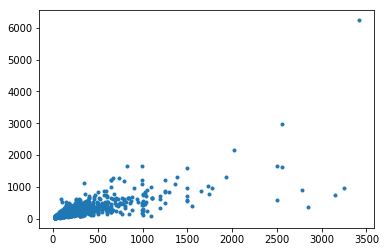

In [39]:
plt.plot(10**y_test, 10**y_pred, '.')

(0, 1000)

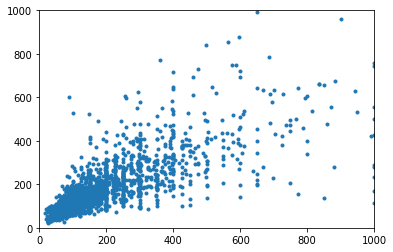

In [40]:
plt.plot(10**y_test, 10**y_pred, '.')
plt.xlim(0,1000)
plt.ylim(0,1000)

In [41]:
from sklearn import pipeline
from sklearn_pandas import cross_val_score

from sklearn_pandas.cross_validation import cross_val_score

In [42]:
pipe = pipeline.Pipeline([
    ('featurize', mapper),
    ('rlm', Ridge(alpha = 1e1))
])

#cross_val_score(pipe, X=df_rel_ind, y=np.log10(np.array(df.price)), scoring='mean_absolute_error', n_jobs = -1)